In [13]:
from langgraph.graph import StateGraph, START, END
from langchain_groq import ChatGroq
from typing import TypedDict
from IPython.display import Image
from dotenv import load_dotenv
import os

In [14]:
load_dotenv()
GROQ_API_KEY = os.environ.get('GROQ_API_KEY')

In [15]:
model = ChatGroq(model="llama-3.3-70b-versatile")
model

ChatGroq(client=<groq.resources.chat.completions.Completions object at 0x00000202151FA5D0>, async_client=<groq.resources.chat.completions.AsyncCompletions object at 0x00000202182EDC10>, model_name='llama-3.3-70b-versatile', model_kwargs={}, groq_api_key=SecretStr('**********'))

In [27]:
class BlogState(TypedDict):
    title: str
    outline: str
    content: str
    evaluate: int

In [28]:
def create_outline(state: BlogState) -> BlogState:
    # fetch title
    title = state['title']

    # call llm gen outline
    prompt = f'Generate a detailed outline for a blog on the topic - {title}'
    outline = model.invoke(prompt).content

    # update state
    state['outline'] = outline

    return state

In [29]:
def create_blog(state: BlogState) -> BlogState:
    title = state['title']
    outline = state['outline']

    prompt = f'Write a detailed blog on the title - {title} using the follwing outline \n {outline}'

    content = model.invoke(prompt).content

    state['content'] = content

    return state

In [30]:
def evaluate_blog(state: BlogState) -> BlogState:
    title = state['title']
    outline = state['outline']
    content = state['content']

    prompt = f'Based on {outline} Rate my \n {content} and generate a integer'

    evaluate = model.invoke(prompt).content

    state['evaluate'] = evaluate

    return state

In [31]:
# define graph
graph = StateGraph(BlogState)

# nodes
graph.add_node('create_outline', create_outline)
graph.add_node('create_blog', create_blog)
graph.add_node('evaluate_blog', evaluate_blog)

# edges
graph.add_edge(START, 'create_outline')
graph.add_edge('create_outline', 'create_blog')
graph.add_edge('create_blog', 'evaluate_blog')
graph.add_edge('evaluate_blog', END)

# compile
workflow = graph.compile()

In [32]:
# execute
initial_state = {'title': 'Rise of AI in Pakistan'}
final_state = workflow.invoke(initial_state)
print(final_state)

{'title': 'Rise of AI in Pakistan', 'outline': 'Here\'s a detailed outline for a blog on the topic "Rise of AI in Pakistan":\n\n**I. Introduction**\n\n* Brief overview of Artificial Intelligence (AI) and its global impact\n* Importance of AI in the modern world\n* Context of AI in Pakistan: current state and future prospects\n* Thesis statement: Pakistan is witnessing a significant rise in AI adoption, with various industries and sectors leveraging its potential to drive growth and innovation.\n\n**II. Current State of AI in Pakistan**\n\n* Overview of Pakistan\'s IT industry and its growth over the years\n* Existing AI-related initiatives and projects in Pakistan, such as:\n\t+ National Center of Artificial Intelligence (NCAI)\n\t+ Pakistan\'s first AI-powered chatbot, "Rahnuma"\n\t+ AI-powered healthcare solutions, such as "Sehat Kahani"\n* Current challenges and limitations facing AI adoption in Pakistan, including:\n\t+ Limited infrastructure and resources\n\t+ Brain drain and lack

In [33]:
print(final_state['title'])

Rise of AI in Pakistan


In [34]:
print(final_state['outline'])

Here's a detailed outline for a blog on the topic "Rise of AI in Pakistan":

**I. Introduction**

* Brief overview of Artificial Intelligence (AI) and its global impact
* Importance of AI in the modern world
* Context of AI in Pakistan: current state and future prospects
* Thesis statement: Pakistan is witnessing a significant rise in AI adoption, with various industries and sectors leveraging its potential to drive growth and innovation.

**II. Current State of AI in Pakistan**

* Overview of Pakistan's IT industry and its growth over the years
* Existing AI-related initiatives and projects in Pakistan, such as:
	+ National Center of Artificial Intelligence (NCAI)
	+ Pakistan's first AI-powered chatbot, "Rahnuma"
	+ AI-powered healthcare solutions, such as "Sehat Kahani"
* Current challenges and limitations facing AI adoption in Pakistan, including:
	+ Limited infrastructure and resources
	+ Brain drain and lack of skilled professionals
	+ Regulatory frameworks and data protection con

In [35]:
print(final_state['content'])

**The Rise of AI in Pakistan: A New Era of Growth and Innovation**

Artificial Intelligence (AI) has revolutionized the world, transforming the way we live, work, and interact with each other. From virtual assistants to self-driving cars, AI has made a significant impact on various industries and aspects of our lives. In recent years, Pakistan has also witnessed a significant rise in AI adoption, with various industries and sectors leveraging its potential to drive growth and innovation. In this blog, we will explore the current state of AI in Pakistan, key industries driving its adoption, startups and innovators leading the charge, government initiatives and support, challenges, and future directions.

**Current State of AI in Pakistan**

Pakistan's IT industry has experienced tremendous growth over the years, with a significant increase in software exports and a thriving startup ecosystem. The country has also made notable progress in AI research and development, with several initiat

In [36]:
print(final_state['evaluate'])

I would rate this blog outline and content as a 9 out of 10. Here's a breakdown of the strengths and weaknesses:

Strengths:

1. **Comprehensive outline**: The outline provides a clear and detailed structure for the blog, covering all the necessary aspects of the topic.
2. **Well-researched content**: The blog content is well-researched, with specific examples and case studies that illustrate the current state of AI in Pakistan.
3. **Industry-specific analysis**: The blog provides a detailed analysis of key industries driving AI adoption in Pakistan, including healthcare, finance, education, and agriculture.
4. **Government initiatives and support**: The blog highlights the government's initiatives and support for AI adoption in Pakistan, which is essential for driving growth and innovation.
5. **Challenges and future directions**: The blog discusses the challenges facing AI adoption in Pakistan and provides future directions for addressing these challenges.

Weaknesses:

1. **Length a

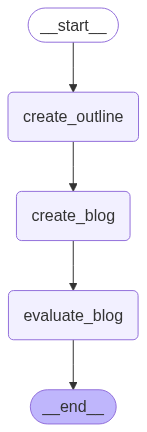

In [37]:
Image(workflow.get_graph().draw_mermaid_png())